In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  layers, Sequential, Input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img
 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from config import conf, test_conf, train_conf

In [2]:
loaded_model = keras.models.load_model(test_conf.latest_best)
loaded_dataset = keras.utils.image_dataset_from_directory(
    conf.test_dir,
    image_size=train_conf.img_shape, 
    batch_size=train_conf.batch_size,
    shuffle=True
)

Found 573 files belonging to 4 classes.


In [3]:
#pick sample image

sample_image = None

for i in loaded_dataset:
    sample_image = i[0][0]
    break

In [4]:
model_layers = {
    "end_cnn" : "max_pool_8",
    "clsf_lyrs": ["flatten_0", "dense_0", "dense_1", "dense_2"]
}

In [5]:
from grad_cam import grad_cam
from guided_gradcam import guided_gradcam
from grad_cam_pp import grad_cam_plus
from guided_gradcam_pp import guided_grad_cam_plus_plus

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 383.5, 383.5, -0.5)

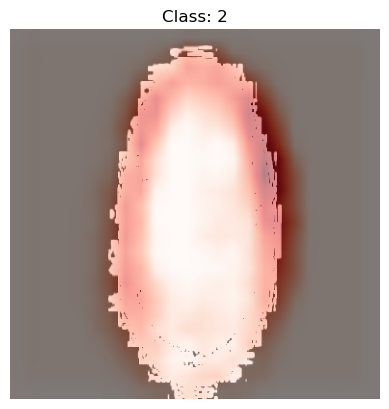

In [10]:
heatmap = grad_cam(loaded_model, sample_image, model_layers['end_cnn'], model_layers['clsf_lyrs'])   
# heatmap, a1 = grad_cam_plus(loaded_model, sample_image, model_layers['end_cnn'], model_layers['clsf_lyrs'])
pred_res = loaded_model(np.expand_dims(sample_image, axis=0))
selected_class = np.argmax(pred_res)

plt.imshow(sample_image)
plt.imshow(heatmap, alpha=0.5, cmap="Reds")
plt.title(f"Class: {selected_class}")
plt.savefig("sample_gc.jpg")
plt.axis("off")